### MTH 459/559 - Ch 14 Implied Volatility

In [1]:
# ch14_implied_volatility.ipynb  
import numpy as np # numerical & math calculations
import matplotlib.pyplot as plt # graphing 
import scipy.stats as sp # prob/stat functions

Taking functions for d1, d2, C_euro from Ch 8 code, adding function for "vega"  
C_vega = dC/dsigma = S N'(d1) sqrt(T-t)   
where N'(x) = (1/sqrt(2pi) exp(-x^2/2) = sp.norm.pdf(x)

In [2]:
# define functions needed for European Call
def d1(S,K,T,t,r,sigma):
    d1 = (np.log(S/K) + (r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return d1
def d2(S,K,T,t,r,sigma):
    d2 = (np.log(S/K) + (r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return d2
def C_euro(S,K,T,t,r,sigma):
    C_euro = S*sp.norm.cdf(d1(S,K,T,t,r,sigma))-\
        K*np.exp(-r*(T-t))*sp.norm.cdf(d2(S,K,T,t,r,sigma)) 
    return C_euro
def C_vega(S,K,T,t,r,sigma):
    C_vega = S*sp.norm.pdf(d1(S,K,T,t,r,sigma))*np.sqrt(T-t)
    return C_vega

In [3]:
# test parameters
S = 100;
K = 140;
T = 2;
t = 0;
r = 0.05;
sigma = 0.3;
print(C_euro(S,K,T,t,r,sigma),C_vega(S,K,T,t,r,sigma))

8.525735006558161 53.154909762878134


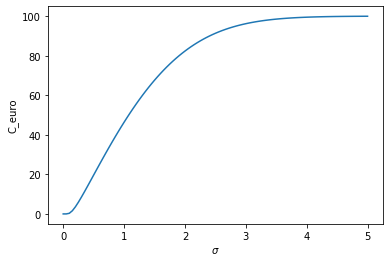

In [4]:
eps = 1e-4; # a small number to avoid divide by zero at sigma = 0
sigma = np.linspace(eps,5,101);
plt.plot(sigma,C_euro(S,K,T,t,r,sigma))
plt.xlabel('$\sigma$')
plt.ylabel('C_euro')
plt.show()

In [5]:
# Use given C_star to find implied volatility sigma_star from C(sigma_star)=C_star
# using Newton's method
C_star = 40;  # given value of C
sigma_old = 0.3  # initial guess for sigma
inewt=0 # counter for number of interations
print('inewt    sigma         C-C_star')
while abs(C_euro(S,K,T,t,r,sigma_old)-C_star) > 1e-8:  # iterate until error in eqn < 1e-8
    inewt=inewt+1          # update counter of iterations
    # sigma1 = sigma0 - (C(sigma0)-Cstar)/vega(sigma0)
    sigma_new = sigma_old-(C_euro(S,K,T,t,r,sigma_old)-C_star)/C_vega(S,K,T,t,r,sigma_old)
    print(inewt,sigma_new, C_euro(S,K,T,t,r,sigma_new)-C_star)
    sigma_old = sigma_new  # update guess to improved estimate
sigma_star = sigma_new     # save converged result as sigma_star
print('implied volatility = ',sigma_star)

inewt    sigma         C-C_star
1 0.8921233830298507 0.9538535086364774
2 0.8734704225908768 -0.0035917244908176826
3 0.8735401370203366 -4.9426908788063884e-08
4 0.8735401379797263 0.0
implied volatility =  0.8735401379797263


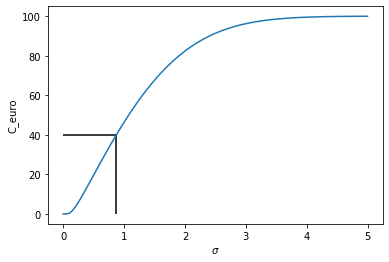

In [6]:
plt.plot(sigma,C_euro(S,K,T,t,r,sigma))
plt.hlines(C_star,0,sigma_new)
plt.vlines(sigma_star,0,C_star)
plt.xlabel('$\sigma$')
plt.ylabel('C_euro')
plt.show()

Note: "automatic" rootfinding functions exist (eg [scipy.optimize.root_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar) ) but need to use special syntax to distinguish between the variable (here sigma) and parameters (S, K, T, t, r).